In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df['charges'] = df['charges'].astype('int')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884
1,18,male,33.770,1,no,southeast,1725
2,28,male,33.000,3,no,southeast,4449
3,33,male,22.705,0,no,northwest,21984
4,32,male,28.880,0,no,northwest,3866


In [6]:
import numpy
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
for i in df.columns:
    if type(df[i][2])==numpy.bool_ or type(df[i][0])==str:
        df[i]= label_encoder.fit_transform(df[i])

In [10]:
# df2 = df.drop('chargescat', axis =1)
X=df.drop('charges',axis=1)
y=df['charges']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import balanced_accuracy_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0,max_iter=1000)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)


c:\Users\bala9\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
balanced_accuracy_score(y_test, y_pred)

c:\Users\bala9\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.007556675062972292

In [17]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884
1,18,1,33.770,1,0,2,1725
2,28,1,33.000,3,0,2,4449
3,33,1,22.705,0,0,1,21984
4,32,1,28.880,0,0,1,3866
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600
1334,18,0,31.920,0,0,0,2205
1335,18,0,36.850,0,0,2,1629
1336,21,0,25.800,0,0,3,2007


In [20]:
import math
import sklearn.metrics as sm
from sklearn.linear_model import LinearRegression
X=df.drop('charges',axis=1)
y=df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
x=math.sqrt(sm.mean_squared_error(y_test, y_pred))

In [21]:
x


5771.616138591527

In [22]:
x/(df.charges.min()+df.charges.max())

0.08894324542065196

Estimated coefficients:
b_0 = 3165.373765194823 
b_1 = 257.72307711106436


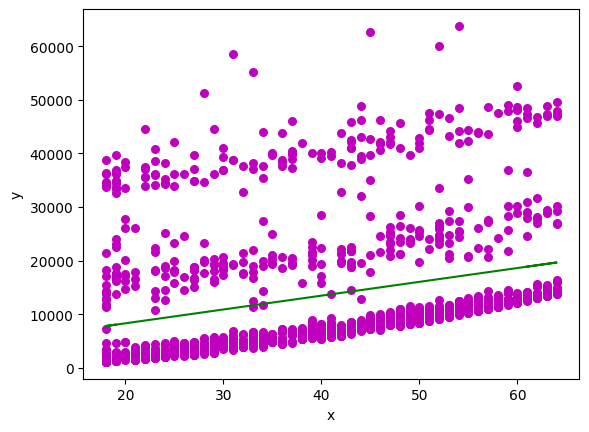

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()

def main():
    # observations / data
    x=df["age"]
    y=df['charges']

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)

if __name__ == "__main__":
    main()
